In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from datetime import datetime
import requests
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-32.68976003259612 6.855364577688988
-47.35205957891824 133.75952579976484
27.216296183663914 -100.67156407161617
-63.476889687598174 125.54313808394517
76.72585882167976 166.29549621052968
5.627858714715586 43.9975497522627
-33.72747108596936 -141.7237910152984
86.77649339768604 26.756459321958687
-43.19326434763108 -157.86920767447657
-82.04549842779352 -54.79463560942695
-33.96380362757356 136.93465537339546
58.54422802961591 135.72228924749112
5.724356601152991 0.2092050002613064
-38.192295580058435 76.45406282458106
81.18641865772395 43.630513727795915
-44.97150209046367 171.2885578715817
37.79377633608459 14.969749996656077
-6.6479745593116775 -15.406328121575712
67.54199784052804 -171.5853135108504
-50.854472935178464 -108.15579722730313
-27.19180204915041 -19.67745884927598
78.30794547529464 30.518227451051274
-1.748236847306714 136.59987326209455
69.51568281359641 15.384645506019552
-63.767681875887 80.75498232620947
83.27432066397998 15.880110259579538
-38.401930279568695 161

48.32904603317863 -168.3532699155597
2.9963984637692818 -97.37038511455073
-67.9010456007563 126.5722033268147
55.352813938287596 74.41546399785307
-35.81330913521949 -69.3640226442118
-10.365689125001197 11.825564815457227
-22.785828103238885 -18.501372058500834
80.19125853728906 -124.40445710217489
-38.88727588007081 -113.55823080162335
-34.09688144114886 -7.728166488927144
-16.48233854356178 -90.1755918963564
-28.931066374952678 -152.09883471996818
-45.72667585434355 134.44865871868524
-71.39692950773443 -44.8504330671623
20.218431163969328 70.64452870365756
39.121145265027764 54.939043727157525
65.45856953427415 -48.59399987088321
-14.41059273209504 47.15517320771559
-55.31955268066103 -89.83888194194977
-88.19885991358944 -164.22810624914808
-75.01061014137477 -138.21422682473838
-54.441355508981815 166.26780066283806
-57.152061486035294 77.80651157707058
31.596068544397 -72.17418756080133
8.29765799163971 149.70125392149987
77.695765203077 37.34864248943106
-66.03945024800663 -98

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # enumerate() method references the index and the city in the list.

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | luderitz
Processing Record 2 of Set 1 | mount gambier
Processing Record 3 of Set 1 | lampazos de naranjo
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | xuddur
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | whyalla
Processing Record 12 of Set 1 | ust-maya
Processing Record 13 of Set 1 | tema
Processing Record 14 of Set 1 | mahebourg
Processing Record 15 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 16 of Set 1 | pareora
Processing Record 17 of Set 1 | randazzo
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | lavrentiya
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | berlevag
Proces

Processing Record 40 of Set 4 | alice springs
Processing Record 41 of Set 4 | alofi
Processing Record 42 of Set 4 | monte plata
Processing Record 43 of Set 4 | klaksvik
Processing Record 44 of Set 4 | veraval
Processing Record 45 of Set 4 | banda aceh
Processing Record 46 of Set 4 | bandarbeyla
Processing Record 47 of Set 4 | ust-nera
Processing Record 48 of Set 4 | faya
Processing Record 49 of Set 4 | great bend
Processing Record 50 of Set 4 | vega de alatorre
Processing Record 1 of Set 5 | tuatapere
Processing Record 2 of Set 5 | carnarvon
Processing Record 3 of Set 5 | bredasdorp
Processing Record 4 of Set 5 | tommot
Processing Record 5 of Set 5 | cidreira
Processing Record 6 of Set 5 | puerto baquerizo moreno
Processing Record 7 of Set 5 | kavieng
Processing Record 8 of Set 5 | talah
City not found. Skipping...
Processing Record 9 of Set 5 | alyangula
Processing Record 10 of Set 5 | high level
Processing Record 11 of Set 5 | evensk
Processing Record 12 of Set 5 | guadalajara
Proces

Processing Record 30 of Set 8 | kolobrzeg
Processing Record 31 of Set 8 | itarema
Processing Record 32 of Set 8 | yanan
City not found. Skipping...
Processing Record 33 of Set 8 | chaa-khol
City not found. Skipping...
Processing Record 34 of Set 8 | elk city
Processing Record 35 of Set 8 | kolimvari
City not found. Skipping...
Processing Record 36 of Set 8 | west bay
Processing Record 37 of Set 8 | kigoma
Processing Record 38 of Set 8 | geraldton
Processing Record 39 of Set 8 | saint-augustin
Processing Record 40 of Set 8 | alvorada
Processing Record 41 of Set 8 | severo-kurilsk
Processing Record 42 of Set 8 | otradnoye
Processing Record 43 of Set 8 | iskateley
Processing Record 44 of Set 8 | shingu
Processing Record 45 of Set 8 | honiara
Processing Record 46 of Set 8 | altotonga
Processing Record 47 of Set 8 | port augusta
Processing Record 48 of Set 8 | palana
Processing Record 49 of Set 8 | gillette
Processing Record 50 of Set 8 | torbay
Processing Record 1 of Set 9 | katwa
Processi

Processing Record 13 of Set 12 | coquimbo
Processing Record 14 of Set 12 | alghero
Processing Record 15 of Set 12 | grindavik
Processing Record 16 of Set 12 | bokspits
City not found. Skipping...
Processing Record 17 of Set 12 | kotma
Processing Record 18 of Set 12 | natal
Processing Record 19 of Set 12 | ulaangom
Processing Record 20 of Set 12 | maues
Processing Record 21 of Set 12 | maniitsoq
Processing Record 22 of Set 12 | koroni
Processing Record 23 of Set 12 | fortuna
Processing Record 24 of Set 12 | kabompo
Processing Record 25 of Set 12 | presidente medici
Processing Record 26 of Set 12 | villanueva de la serena
Processing Record 27 of Set 12 | christchurch
Processing Record 28 of Set 12 | palmer
Processing Record 29 of Set 12 | padilla
Processing Record 30 of Set 12 | kokomo
Processing Record 31 of Set 12 | emerald
Processing Record 32 of Set 12 | tirthahalli
Processing Record 33 of Set 12 | kuusamo
Processing Record 34 of Set 12 | kendari
Processing Record 35 of Set 12 | mend

In [12]:
len(city_data)

556

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Luderitz,-26.6481,15.1594,56.61,61,3,16.51,NA,2022-07-20 22:22:09
1,Mount Gambier,-37.8333,140.7667,39.22,82,3,5.53,AU,2022-07-20 22:22:09
2,Lampazos De Naranjo,27.0167,-100.5167,108.01,17,13,12.73,MX,2022-07-20 22:22:10
3,Albany,42.6001,-73.9662,94.33,49,47,1.01,US,2022-07-20 22:18:03
4,Pevek,69.7008,170.3133,31.62,88,99,15.46,RU,2022-07-20 22:22:10
5,Xuddur,4.1213,43.8894,73.36,53,98,19.30,SO,2022-07-20 22:22:10
6,Rikitea,-23.1203,-134.9692,73.35,75,0,3.98,PF,2022-07-20 22:22:11
7,Longyearbyen,78.2186,15.6401,49.84,87,75,5.75,SJ,2022-07-20 22:22:11
8,Mataura,-46.1927,168.8643,40.48,88,100,2.84,NZ,2022-07-20 22:22:11
9,Ushuaia,-54.8000,-68.3000,31.66,86,100,18.41,AR,2022-07-20 22:18:02


In [19]:
new_column_order = ["City", 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed'] 
city_data_df=city_data_df[new_column_order]
city_data_df.head(5)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Luderitz,NA,2022-07-20 22:22:09,-26.6481,15.1594,56.61,61,3,16.51
1,Mount Gambier,AU,2022-07-20 22:22:09,-37.8333,140.7667,39.22,82,3,5.53
2,Lampazos De Naranjo,MX,2022-07-20 22:22:10,27.0167,-100.5167,108.01,17,13,12.73
3,Albany,US,2022-07-20 22:18:03,42.6001,-73.9662,94.33,49,47,1.01
4,Pevek,RU,2022-07-20 22:22:10,69.7008,170.3133,31.62,88,99,15.46


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Scatter Plot

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


#### Max Temp

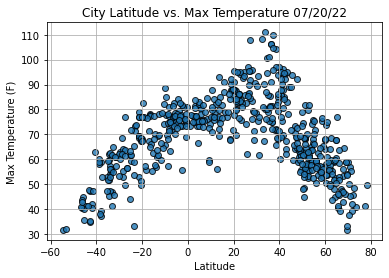

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

#### Humidity

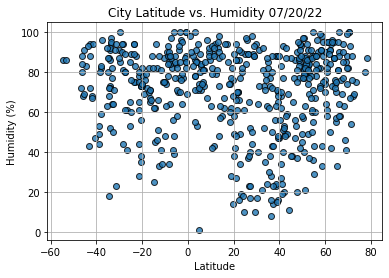

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

#### Cloudiness

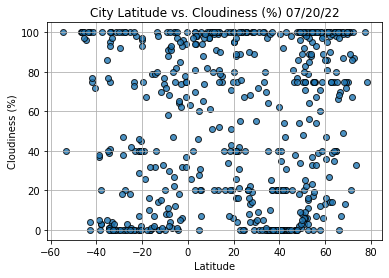

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

#### Wind Speed

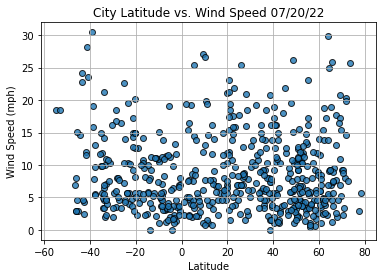

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()